In [2]:
library(ggplot2)
library(dplyr)
library(scales)
library("ggsci")
library("viridis")
library("ggpubr")
library("Seurat")
#remotes::install_github("mojaveazure/seurat-disk")
library("SeuratDisk")
#install.packages("ggplot2")
library(ggplot2)
#install.packages("remotes")
#remotes::install_github("chris-mcginnis-ucsf/DoubletFinder", force=TRUE)
library(DoubletFinder)
library(dplyr)
library(tidyverse)

In [2]:
## Step 1, Read the .rds file
### For SCAF2326_81-72-75-4 ###
SCAF2326 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2326/alternate_cell_cycle_regress_out/SCAF2326_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2326_new <- RunUMAP(SCAF2326, dims = 1:20)
#DimPlot(SCAF2326_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2326_labels <- SCAF2326_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2326_counts <- table(SCAF2326_labels)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:15:34 UMAP embedding parameters a = 0.9922 b = 1.112

20:15:34 Read 2232 rows and found 20 numeric columns

20:15:34 Using Annoy for neighbor search, n_neighbors = 30

20:15:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:15:34 Writing NN index file to temp file /lscratch/8034172/RtmpKuBiIw/file3fc88a2e6ce017

20:15:34 Searching Annoy index using 1 thread, search_k = 3000

20:15:35 Annoy recall = 100%

20:15:35 Commencing smooth kNN distance calibration using 1 thread
 with targe

In [5]:
SCAF2326_df <- data.frame(SCAF2326_counts)
head(SCAF2326_df)

,SCAF2326_labels,Freq
,<fct>,<int>
1,0,289
2,1,288
3,2,216
4,3,217
5,4,181
6,5,174


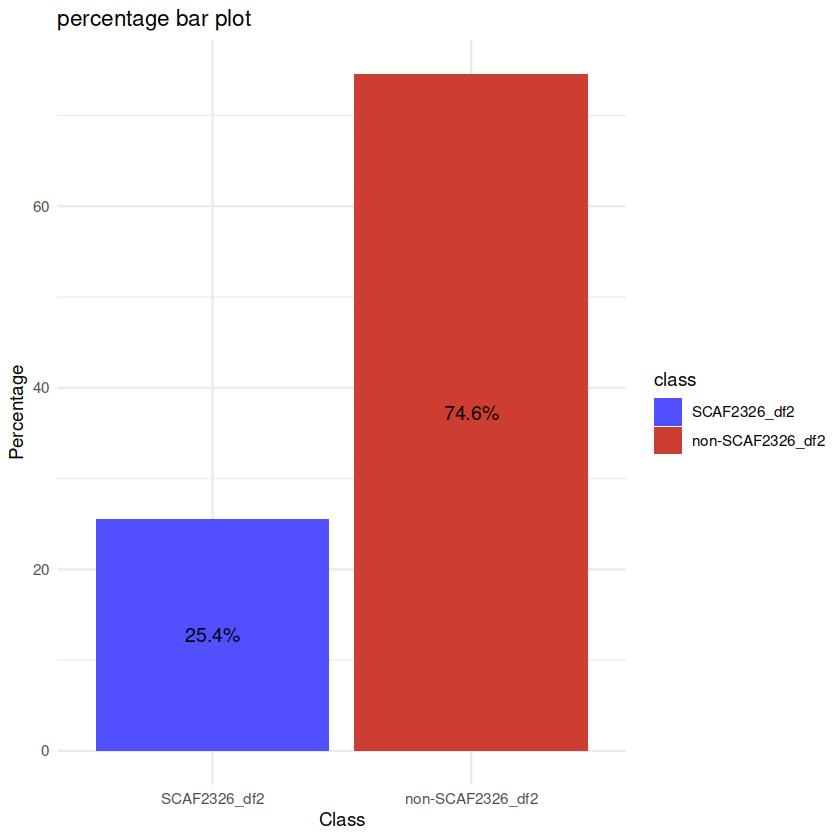

In [9]:
# Label the rows as "SCAF2326_df2" or "non-SCAF2326_df2"
SCAF2326_df2 <- SCAF2326_df %>%
  mutate(class = ifelse(SCAF2326_labels %in% c(0, 6, 8), "SCAF2326_df2", "non-SCAF2326_df2"))

# Calculate the total frequency for each class
total_SCAF2326_df2 <- sum(SCAF2326_df2$Freq[SCAF2326_df2$class == "SCAF2326_df2"])
total_non_SCAF2326_df2 <- sum(SCAF2326_df2$Freq[SCAF2326_df2$class == "non-SCAF2326_df2"])

# Calculate the percentage of SCAF2326_df2 and non-SCAF2326_df2 cells
percentage_SCAF2326_df2 <- (total_SCAF2326_df2 / sum(SCAF2326_df2$Freq)) * 100
percentage_non_SCAF2326_df2 <- (total_non_SCAF2326_df2 / sum(SCAF2326_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("SCAF2326_df2", "non-SCAF2326_df2"),
  percentage = c(percentage_SCAF2326_df2, percentage_non_SCAF2326_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()


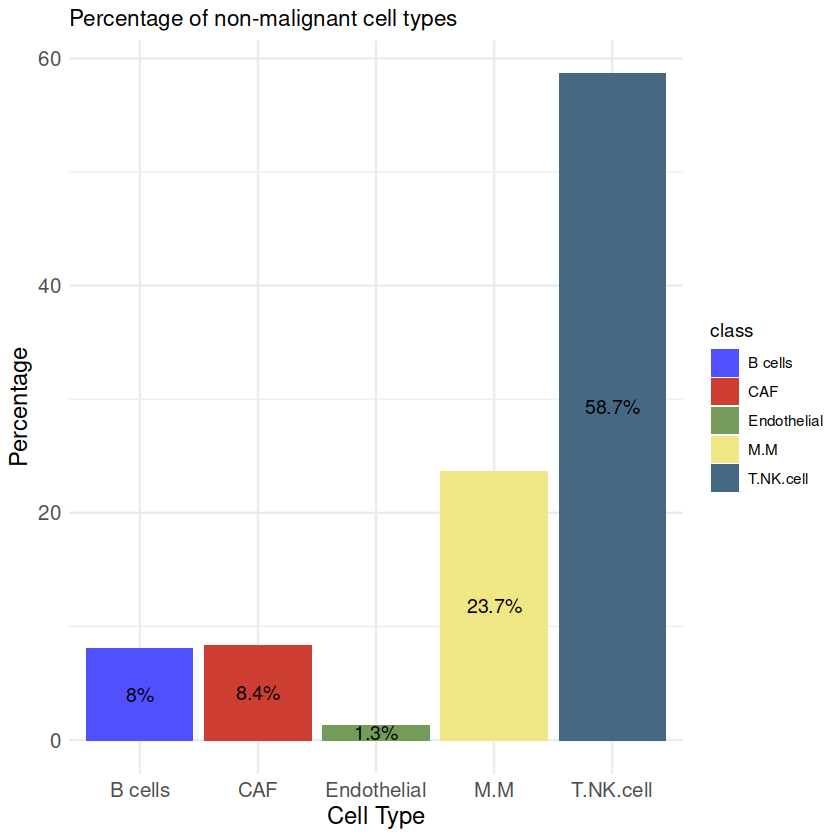

In [12]:
# Define label mappings
SCAF2326_df3 <- SCAF2326_df
label_mapping <- list(
  "T.NK.cell" = c(1, 2, 3, 11, 12),
  "B cells" = c(10, 13),
  "M.M" = c(5, 9, 14, 16),
  "CAF" = 7,
  "Endothelial" = 15
)

# Map labels based on the defined mapping
SCAF2326_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF2326_df3$class[SCAF2326_df3$SCAF2326_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF2326_df3 <- SCAF2326_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF2326_df3$Freq)

# Calculate the percentage of each label group
SCAF2326_df3 <- SCAF2326_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF2326_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [13]:
## For sample SCAF2497
SCAF2497 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2497/alternate_cell_cycle_regress_out/SCAF2497_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2497_new <- RunUMAP(SCAF2497, dims = 1:20)
#DimPlot(SCAF2497_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2497_labels <- SCAF2497_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2497_counts <- table(SCAF2497_labels)

20:25:49 UMAP embedding parameters a = 0.9922 b = 1.112

20:25:49 Read 4366 rows and found 20 numeric columns

20:25:49 Using Annoy for neighbor search, n_neighbors = 30

20:25:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:25:50 Writing NN index file to temp file /lscratch/8034172/RtmpKuBiIw/file3fc88a4045cae2

20:25:50 Searching Annoy index using 1 thread, search_k = 3000

20:25:51 Annoy recall = 100%

20:25:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:25:52 Initializing from normalized Laplacian + noise (using RSpectra)

20:25:53 Commencing optimization for 500 epochs, with 187896 positive edges

20:25:59 Optimization finished



In [14]:
SCAF2497_df <- data.frame(SCAF2497_counts)
head(SCAF2497_df)

,SCAF2497_labels,Freq
,<fct>,<int>
1,0,622
2,1,491
3,2,319
4,3,353
5,4,389
6,5,393


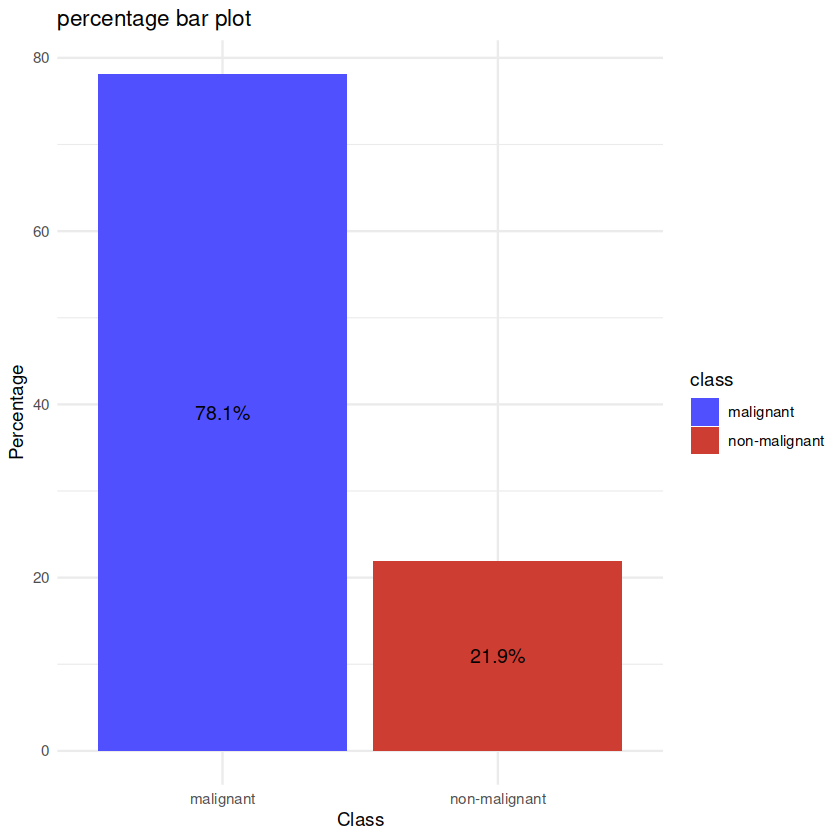

In [17]:

SCAF2497_df2 <- SCAF2497_df %>%
  mutate(class = ifelse(SCAF2497_labels %in% c(0,1,2,3,4,5,7,8,10,15,17,18), "malignant", "non-malignant"))

# Calculate the total frequency for each class
total_SCAF2497_df2 <- sum(SCAF2497_df2$Freq[SCAF2497_df2$class == "malignant"])
total_non_SCAF2497_df2 <- sum(SCAF2497_df2$Freq[SCAF2497_df2$class == "non-malignant"])

# Calculate the percentage of SCAF2497_df2 and non-SCAF2497_df2 cells
percentage_SCAF2497_df2 <- (total_SCAF2497_df2 / sum(SCAF2497_df2$Freq)) * 100
percentage_non_SCAF2497_df2 <- (total_non_SCAF2497_df2 / sum(SCAF2497_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF2497_df2, percentage_non_SCAF2497_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()

In [30]:
 SCAF2497_df3 <- SCAF2497_df

In [31]:
SCAF2497_df3

SCAF2497_labels,Freq
<fct>,<int>
0,622
1,491
2,319
3,353
4,389
5,393
6,300
7,272
8,236


In [32]:
label_mapping <- list(
  "T.NK.cell" = 9,
  "M.M" = 16,
  "CAF" = c(6,13),
  "Endothelial" = 14,
  "Non.malig.epith" = c(11,12)
)

# Map labels based on the defined mapping
SCAF2497_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF2497_df3$class[SCAF2497_df3$SCAF2497_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF2497_df3 <- SCAF2497_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF2497_df3$Freq)

# Calculate the percentage of each label group
SCAF2497_df3 <- SCAF2497_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF2497_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [36]:
## For sample SCAF2225
SCAF2225 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2225/alternate_cell_cycle_regress_out/SCAF2225_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2225_new <- RunUMAP(SCAF2225, dims = 1:20)
#DimPlot(SCAF2225_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2225_labels <- SCAF2225_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2225_counts <- table(SCAF2225_labels)

20:43:39 UMAP embedding parameters a = 0.9922 b = 1.112

20:43:39 Read 746 rows and found 20 numeric columns

20:43:40 Using Annoy for neighbor search, n_neighbors = 30

20:43:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:43:40 Writing NN index file to temp file /lscratch/8034172/RtmpKuBiIw/file3fc88a3164fd36

20:43:40 Searching Annoy index using 1 thread, search_k = 3000

20:43:40 Annoy recall = 100%

20:43:40 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:43:41 Initializing from normalized Laplacian + noise (using RSpectra)

20:43:41 Commencing optimization for 500 epochs, with 28100 positive edges

20:43:42 Optimization finished



In [37]:
SCAF2225_df <- data.frame(SCAF2225_counts)
head(SCAF2225_df)

,SCAF2225_labels,Freq
,<fct>,<int>
1,0,188
2,1,139
3,2,122
4,3,67
5,4,65
6,5,60


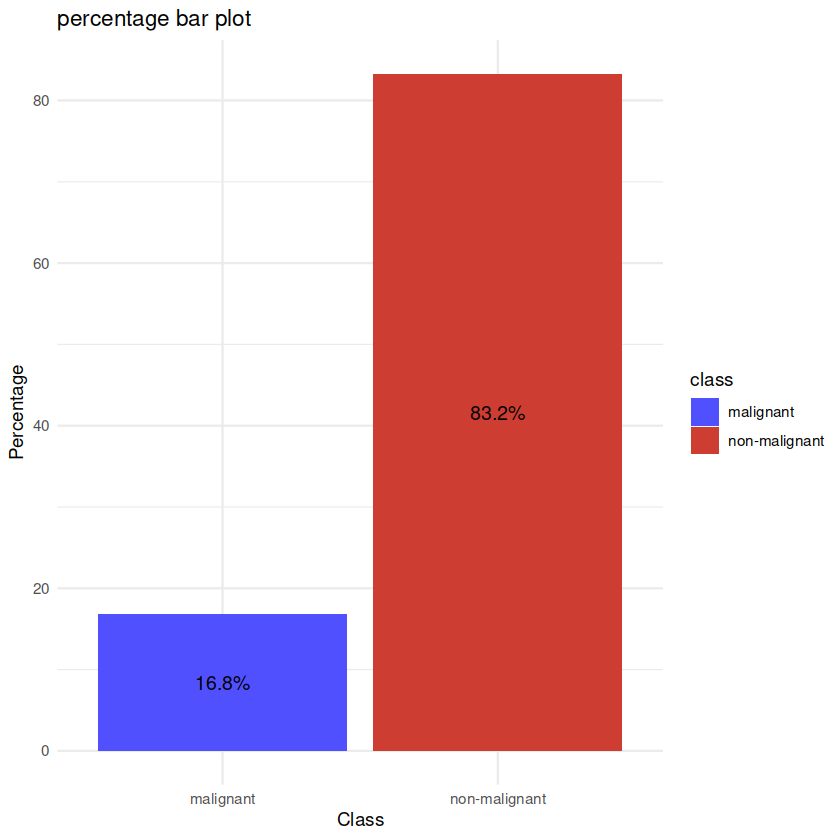

In [38]:
SCAF2225_df2 <- SCAF2225_df %>%
  mutate(class = ifelse(SCAF2225_labels %in% c(4,5), "malignant", "non-malignant"))

# Calculate the total frequency for each class
total_SCAF2225_df2 <- sum(SCAF2225_df2$Freq[SCAF2225_df2$class == "malignant"])
total_non_SCAF2225_df2 <- sum(SCAF2225_df2$Freq[SCAF2225_df2$class == "non-malignant"])

# Calculate the percentage of SCAF2225_df2 and non-SCAF2225_df2 cells
percentage_SCAF2225_df2 <- (total_SCAF2225_df2 / sum(SCAF2225_df2$Freq)) * 100
percentage_non_SCAF2225_df2 <- (total_non_SCAF2225_df2 / sum(SCAF2225_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF2225_df2, percentage_non_SCAF2225_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()

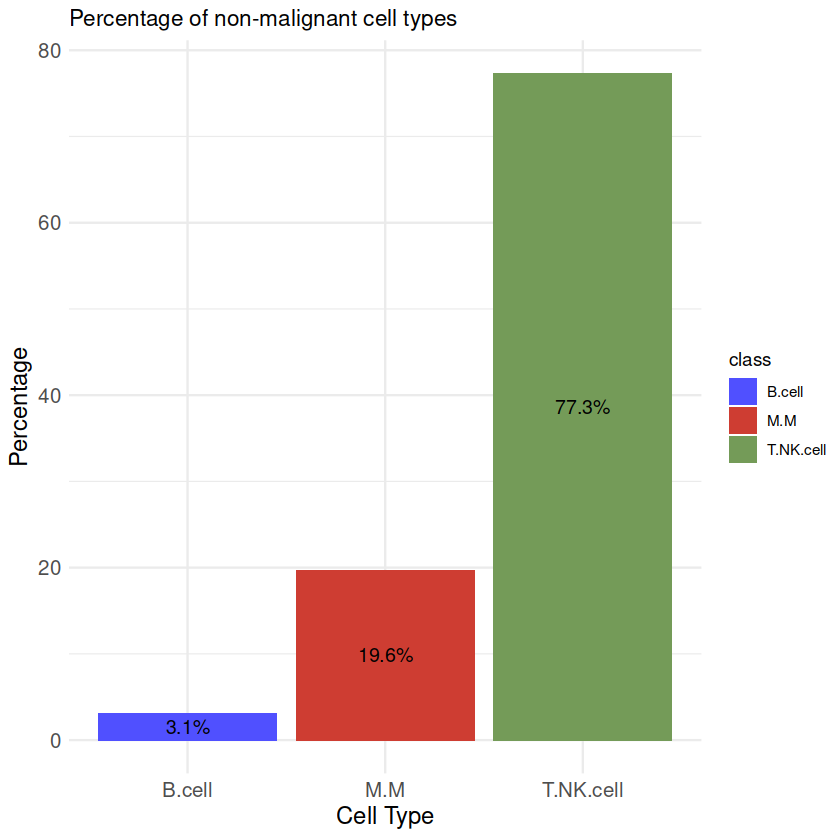

In [40]:
SCAF2225_df3 <- SCAF2225_df
label_mapping <- list(
  "T.NK.cell" = c(0,1,3,6,7),
  "B.cell" = 8, 
  "M.M" = 2 
)

# Map labels based on the defined mapping
SCAF2225_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF2225_df3$class[SCAF2225_df3$SCAF2225_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF2225_df3 <- SCAF2225_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF2225_df3$Freq)

# Calculate the percentage of each label group
SCAF2225_df3 <- SCAF2225_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF2225_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [41]:
## For sample SCAF2229
SCAF2229 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2229/alternate/SCAF2229_cell_cycle_regress_difference_out.rds")
SCAF2229_new <- RunUMAP(SCAF2229, dims = 1:20)
#DimPlot(SCAF2229_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2229_labels <- SCAF2229_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2229_counts <- table(SCAF2229_labels)

20:51:16 UMAP embedding parameters a = 0.9922 b = 1.112

20:51:16 Read 1422 rows and found 20 numeric columns

20:51:16 Using Annoy for neighbor search, n_neighbors = 30

20:51:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:51:16 Writing NN index file to temp file /lscratch/8034172/RtmpKuBiIw/file3fc88a4c418a72

20:51:16 Searching Annoy index using 1 thread, search_k = 3000

20:51:17 Annoy recall = 100%

20:51:17 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:51:18 Initializing from normalized Laplacian + noise (using RSpectra)

20:51:18 Commencing optimization for 500 epochs, with 57616 positive edges

20:51:20 Optimization finished



In [43]:
SCAF2229_df <- data.frame(SCAF2229_counts)

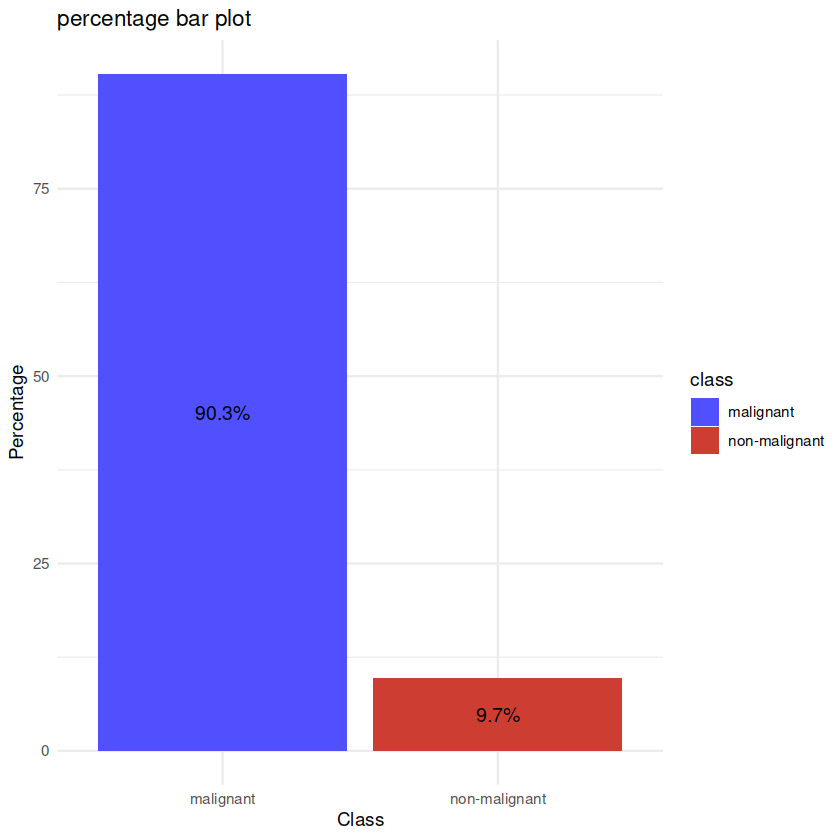

In [44]:
SCAF2229_df2 <- SCAF2229_df %>%
  mutate(class = ifelse(SCAF2229_labels %in% c(0,1,2,3,4,5,6), "malignant", "non-malignant"))

# Calculate the total frequency for each class
total_SCAF2229_df2 <- sum(SCAF2229_df2$Freq[SCAF2229_df2$class == "malignant"])
total_non_SCAF2229_df2 <- sum(SCAF2229_df2$Freq[SCAF2229_df2$class == "non-malignant"])

# Calculate the percentage of SCAF2229_df2 and non-SCAF2229_df2 cells
percentage_SCAF2229_df2 <- (total_SCAF2229_df2 / sum(SCAF2229_df2$Freq)) * 100
percentage_non_SCAF2229_df2 <- (total_non_SCAF2229_df2 / sum(SCAF2229_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF2229_df2, percentage_non_SCAF2229_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()

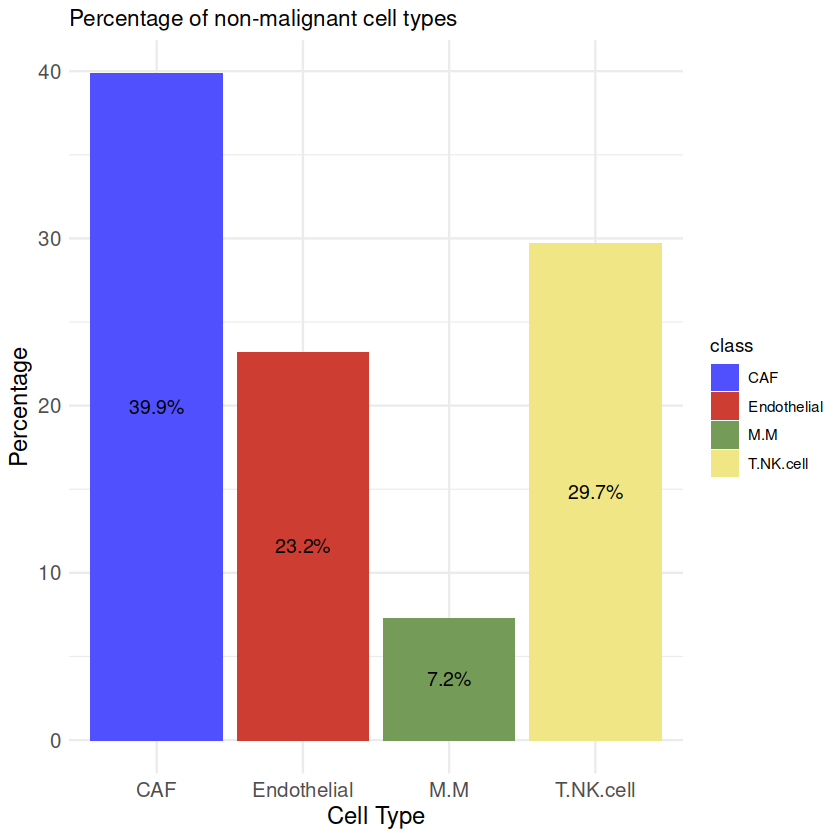

In [45]:
SCAF2229_df3 <- SCAF2229_df
label_mapping <- list(
  "T.NK.cell" = 8,
  "M.M" = 10,
  "CAF" = 7,
  "Endothelial" = 9
)

# Map labels based on the defined mapping
SCAF2229_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF2229_df3$class[SCAF2229_df3$SCAF2229_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF2229_df3 <- SCAF2229_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF2229_df3$Freq)

# Calculate the percentage of each label group
SCAF2229_df3 <- SCAF2229_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF2229_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:48:39 UMAP embedding parameters a = 0.9922 b = 1.112

19:48:39 Read 394 rows and found 20 numeric columns

19:48:39 Using Annoy for neighbor search, n_neighbors = 30

19:48:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:48:39 Writing NN index file to temp file /lscratch/8313375/RtmpBNVeon/file3245b96eeb7d67

19:48:39 Searching Annoy index using 1 thread, search_k = 3000

19:48:40 Annoy recall = 100%

19:48:40 Commencing smooth kNN distance calibration using 1 thread
 with target

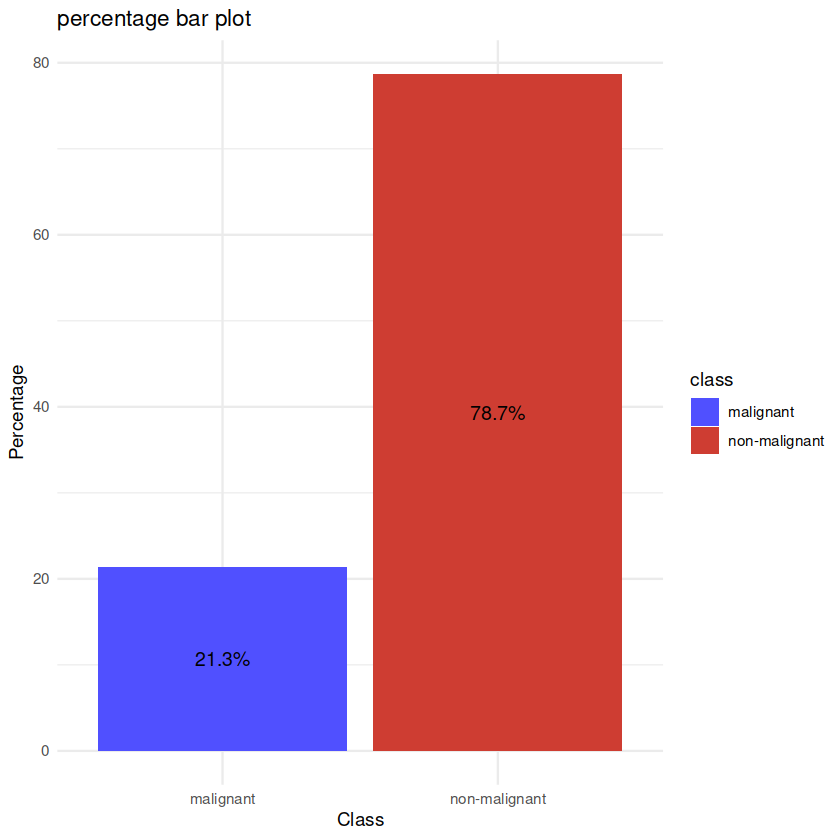

In [3]:
## For sample SCAF2997

## Step 1. Read the dataset .rds file

SCAF2997 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2997/alternate_cell_cycle_regress_out/SCAF2997_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2997_new <- RunUMAP(SCAF2997, dims = 1:20)
#DimPlot(SCAF2997_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2997_labels <- SCAF2997_new$seurat_clusters

## Step 2. Plot parameter starts from here 
# Count the number of cells in each cluster
SCAF2997_counts <- table(SCAF2997_labels)
SCAF2997_df <- data.frame(SCAF2997_counts)


## Step 3. Label the cells as malignant and non-malignant 
SCAF2997_df2 <- SCAF2997_df %>%
  mutate(class = ifelse(SCAF2997_labels %in% c(0), "malignant", "non-malignant")) ## replace this with your data malignant cluster

# Calculate the total frequency for each class
total_SCAF2997_df2 <- sum(SCAF2997_df2$Freq[SCAF2997_df2$class == "malignant"])
total_non_SCAF2997_df2 <- sum(SCAF2997_df2$Freq[SCAF2997_df2$class == "non-malignant"])

# Calculate the percentage of SCAF2997_df2 and non-SCAF2997_df2 cells
percentage_SCAF2997_df2 <- (total_SCAF2997_df2 / sum(SCAF2997_df2$Freq)) * 100
percentage_non_SCAF2997_df2 <- (total_non_SCAF2997_df2 / sum(SCAF2997_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF2997_df2, percentage_non_SCAF2997_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()


## Step 4. For Non-Malignant cells
### FOR SCAF2997, Non-malignant cells , Map the cluster which are Non-malignant, replace these with for data specific 
SCAF2997_df3 <- SCAF2997_df
label_mapping <- list(
  "T.NK.cell" = c(1,3,6),
  "M.M" = c(2,4,5)
)

# Map labels based on the defined mapping
SCAF2997_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF2997_df3$class[SCAF2997_df3$SCAF2997_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF2997_df3 <- SCAF2997_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF2997_df3$Freq)

# Calculate the percentage of each label group
SCAF2997_df3 <- SCAF2997_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF2997_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))



## Step 5. ## For bar plot of all the cells
SCAF2997_df4 <- SCAF2997_df
SCAF2997_df4$SCAF2997_labels <- ifelse(SCAF2997_df4$SCAF2997_labels %in% c(0), "malignant", "non-malignant")
ggplot(SCAF2997_df4, aes(x = SCAF2997_labels, y = Freq, fill = SCAF2997_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")


## Step 6. non_malignant <- SCAF2997_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  "T.NK.cell" = c(1,3,6),
  "M.M" = c(2,4,5)
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2997_labels %in% label_values] <- class_name
}

# Skip labels 0, 6, and 8
non_malignant <- non_malignant[!(non_malignant$SCAF2997_labels %in% c(0)), ] ## replace this with your malgnant cluster


ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

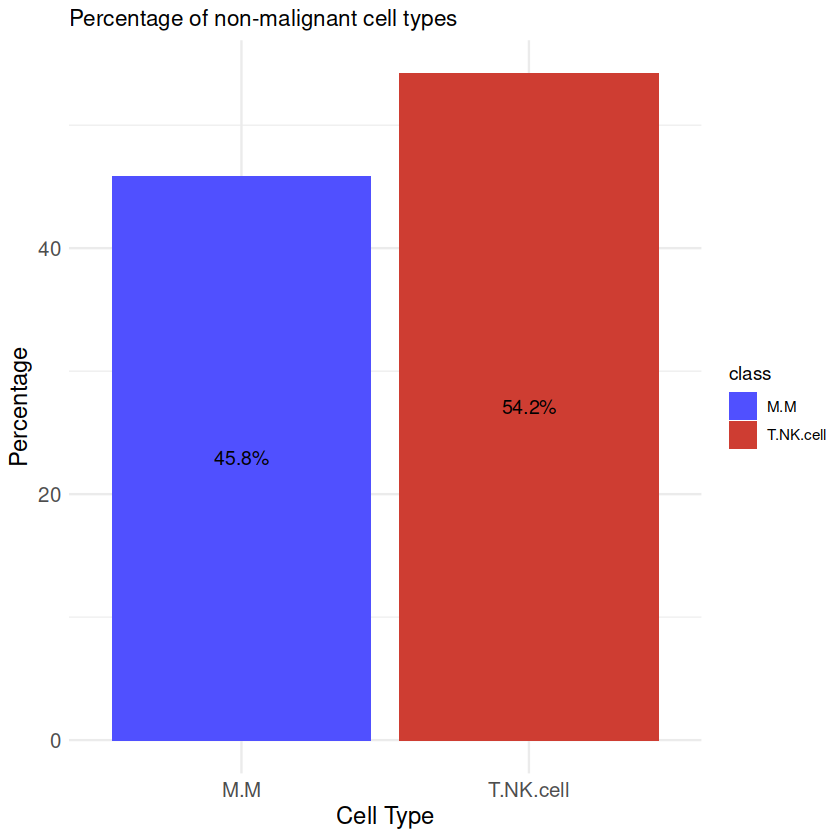

In [6]:
### FOR SCAF2997, Non-malignant cells 
SCAF2997_df3 <- SCAF2997_df
label_mapping <- list(
  "T.NK.cell" = c(1,3,6),
  "M.M" = c(2,4,5)
)

# Map labels based on the defined mapping
SCAF2997_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF2997_df3$class[SCAF2997_df3$SCAF2997_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF2997_df3 <- SCAF2997_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF2997_df3$Freq)

# Calculate the percentage of each label group
SCAF2997_df3 <- SCAF2997_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF2997_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

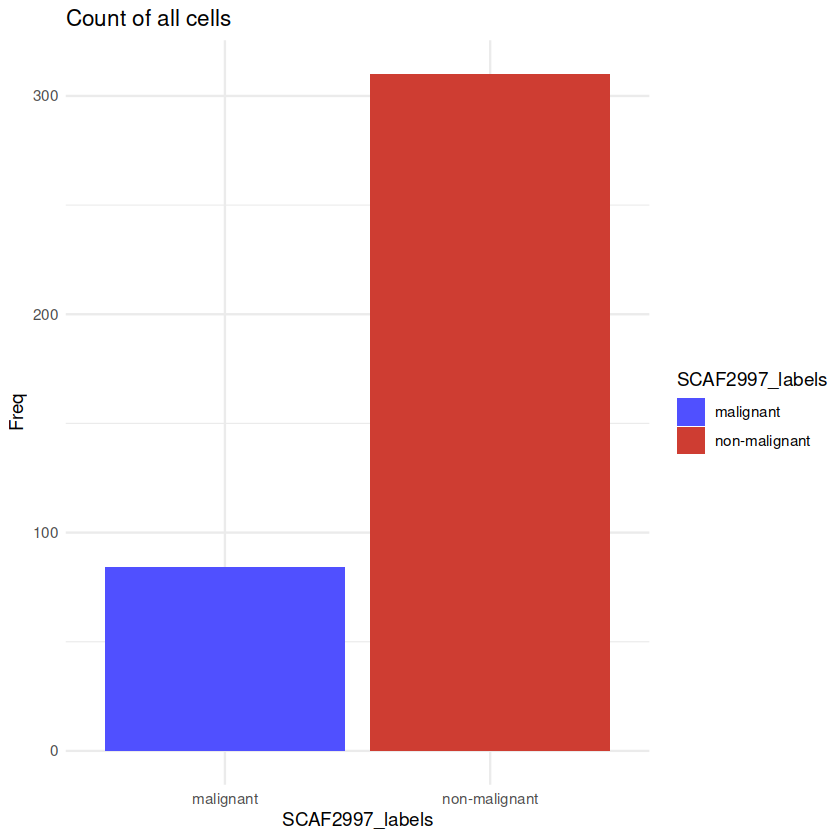

In [14]:
## For bar plot of all the cells
SCAF2997_df4 <- SCAF2997_df
SCAF2997_df4$SCAF2997_labels <- ifelse(SCAF2997_df4$SCAF2997_labels %in% c(0), "malignant", "non-malignant")
ggplot(SCAF2997_df4, aes(x = SCAF2997_labels, y = Freq, fill = SCAF2997_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")


In [21]:
non_malignant <- SCAF2997_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  "T.NK.cell" = c(1,3,6),
  "M.M" = c(2,4,5)
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2997_labels %in% label_values] <- class_name
}

# Skip labels 0, 6, and 8
non_malignant <- non_malignant[!(non_malignant$SCAF2997_labels %in% c(0)), ]

In [22]:
non_malignant

,SCAF2997_labels,Freq,class
,<fct>,<int>,<chr>
2,1,71,T.NK.cell
3,2,75,M.M
4,3,67,T.NK.cell
5,4,36,M.M
6,5,31,M.M
7,6,30,T.NK.cell


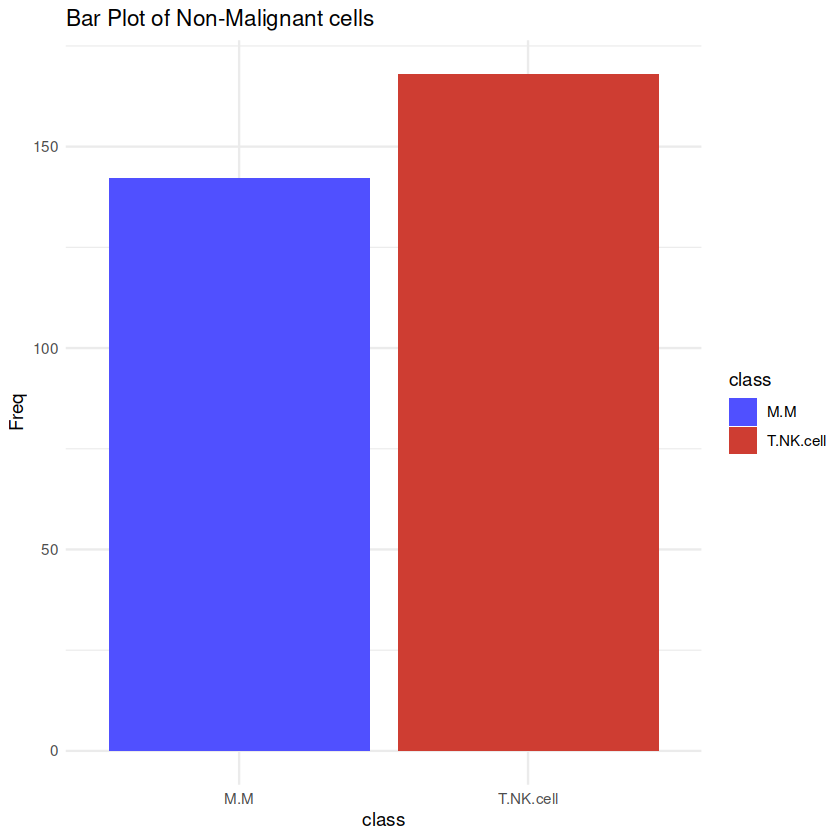

In [23]:

ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

20:29:42 UMAP embedding parameters a = 0.9922 b = 1.112

20:29:42 Read 200 rows and found 20 numeric columns

20:29:42 Using Annoy for neighbor search, n_neighbors = 30

20:29:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:29:42 Writing NN index file to temp file /lscratch/8313375/RtmpBNVeon/file3245b96a603e00

20:29:42 Searching Annoy index using 1 thread, search_k = 3000

20:29:42 Annoy recall = 100%

20:29:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:29:43 Initializing from normalized Laplacian + noise (using RSpectra)

20:29:43 Commencing optimization for 500 epochs, with 7194 positive edges

20:29:44 Optimization finished



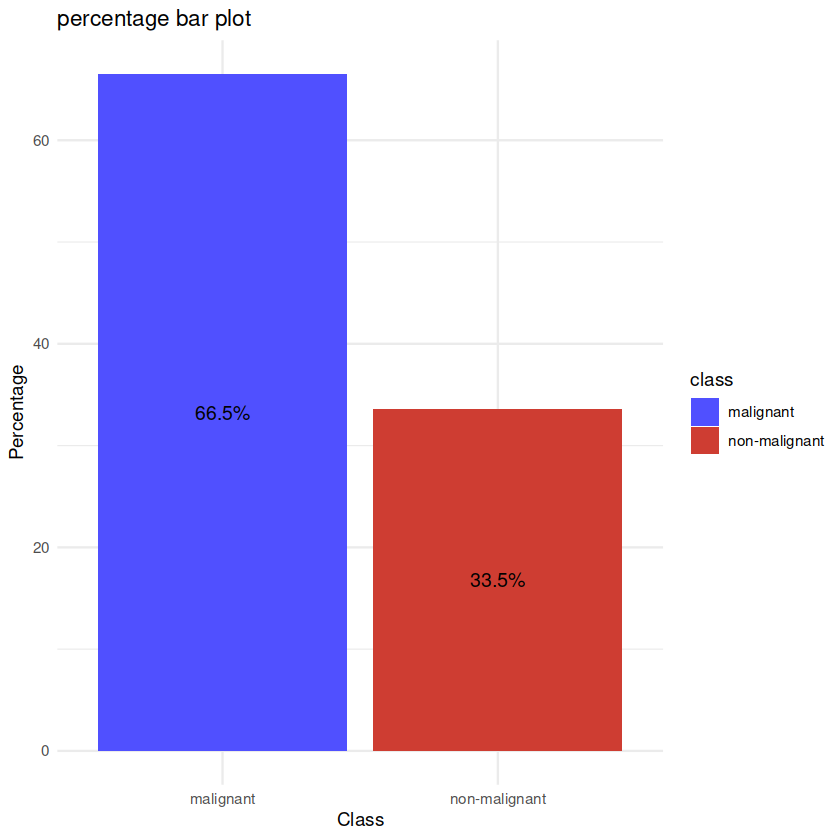

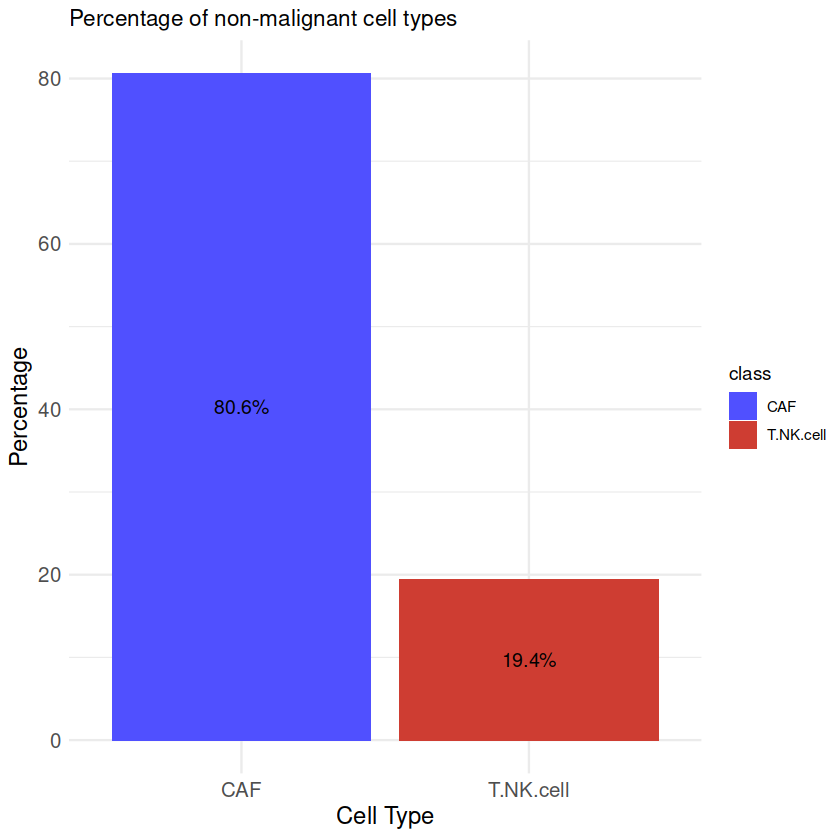

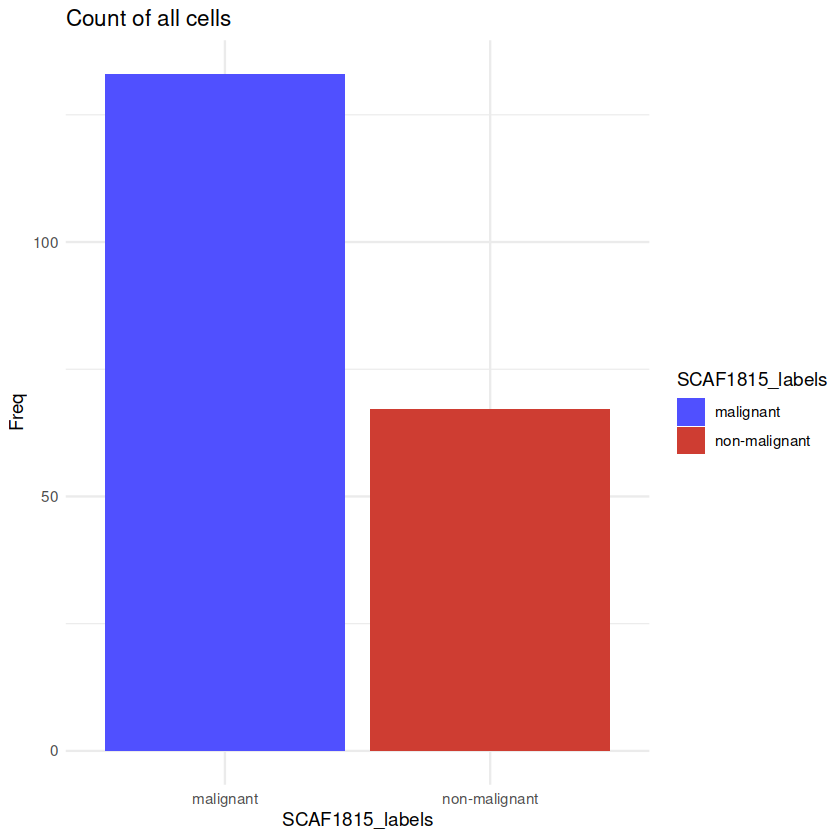

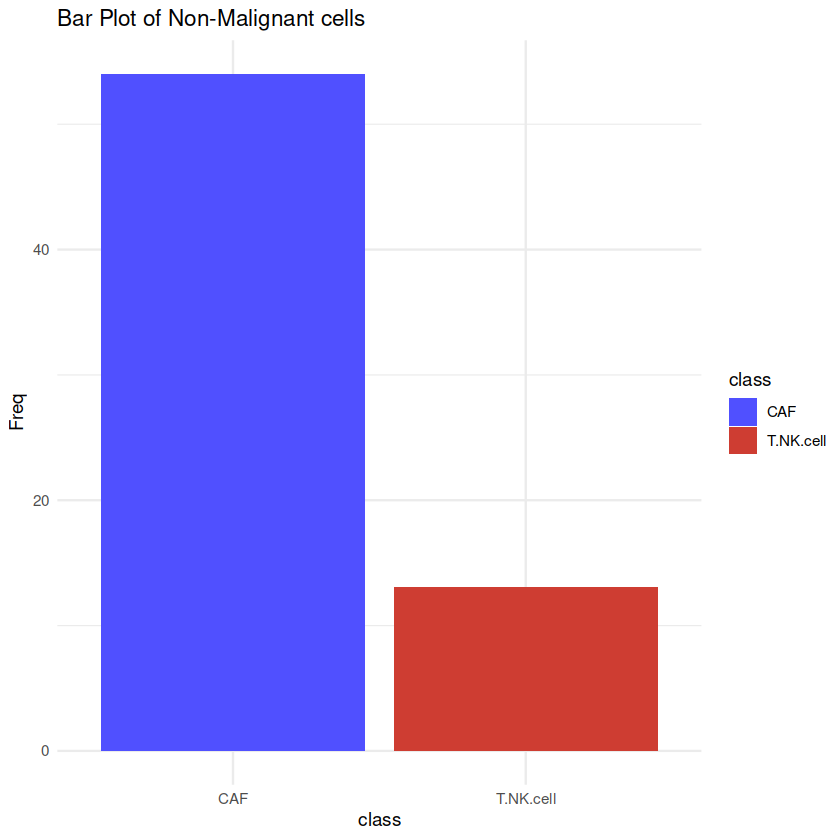

In [24]:
## For sample SCAF1815

## Step 1. Read the dataset .rds file

SCAF1815 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1815/alternate_cell_cycle_regress_out/SCAF1815_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF1815_new <- RunUMAP(SCAF1815, dims = 1:20)
#DimPlot(SCAF1815_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF1815_labels <- SCAF1815_new$seurat_clusters

## Step 2. Plot parameter starts from here 
# Count the number of cells in each cluster
SCAF1815_counts <- table(SCAF1815_labels)
SCAF1815_df <- data.frame(SCAF1815_counts)


## Step 3. Label the cells as malignant and non-malignant 
SCAF1815_df2 <- SCAF1815_df %>%
  mutate(class = ifelse(SCAF1815_labels %in% c(0,2), "malignant", "non-malignant")) ## replace this with your data malignant cluster

# Calculate the total frequency for each class
total_SCAF1815_df2 <- sum(SCAF1815_df2$Freq[SCAF1815_df2$class == "malignant"])
total_non_SCAF1815_df2 <- sum(SCAF1815_df2$Freq[SCAF1815_df2$class == "non-malignant"])

# Calculate the percentage of SCAF1815_df2 and non-SCAF1815_df2 cells
percentage_SCAF1815_df2 <- (total_SCAF1815_df2 / sum(SCAF1815_df2$Freq)) * 100
percentage_non_SCAF1815_df2 <- (total_non_SCAF1815_df2 / sum(SCAF1815_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF1815_df2, percentage_non_SCAF1815_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()


## Step 4. For Non-Malignant cells
### FOR SCAF1815, Non-malignant cells , Map the cluster which are Non-malignant, replace these with for data specific 
SCAF1815_df3 <- SCAF1815_df
label_mapping <- list(
  "T.NK.cell" = 3,
  "CAF" = 1
)

# Map labels based on the defined mapping
SCAF1815_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF1815_df3$class[SCAF1815_df3$SCAF1815_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF1815_df3 <- SCAF1815_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF1815_df3$Freq)

# Calculate the percentage of each label group
SCAF1815_df3 <- SCAF1815_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF1815_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))



## Step 5. ## For bar plot of all the cells
SCAF1815_df4 <- SCAF1815_df
SCAF1815_df4$SCAF1815_labels <- ifelse(SCAF1815_df4$SCAF1815_labels %in% c(0,2), "malignant", "non-malignant")
ggplot(SCAF1815_df4, aes(x = SCAF1815_labels, y = Freq, fill = SCAF1815_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")


## Step 6. For bar plot of non_malignant <- SCAF1815_df
non_malignant <- SCAF1815_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  "T.NK.cell" = 3,
  "CAF" = 1
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF1815_labels %in% label_values] <- class_name
}

# Skip labelsmalignant labels
non_malignant <- non_malignant[!(non_malignant$SCAF1815_labels %in% c(0,2)), ] ## replace this with your malgnant cluster


ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

20:38:16 UMAP embedding parameters a = 0.9922 b = 1.112

20:38:16 Read 82 rows and found 20 numeric columns

20:38:16 Using Annoy for neighbor search, n_neighbors = 30

20:38:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:38:17 Writing NN index file to temp file /lscratch/8313375/RtmpBNVeon/file3245b93ea89719

20:38:17 Searching Annoy index using 1 thread, search_k = 3000

20:38:17 Annoy recall = 100%

20:38:17 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:38:18 Initializing from normalized Laplacian + noise (using RSpectra)

20:38:18 Commencing optimization for 500 epochs, with 2832 positive edges

20:38:18 Optimization finished



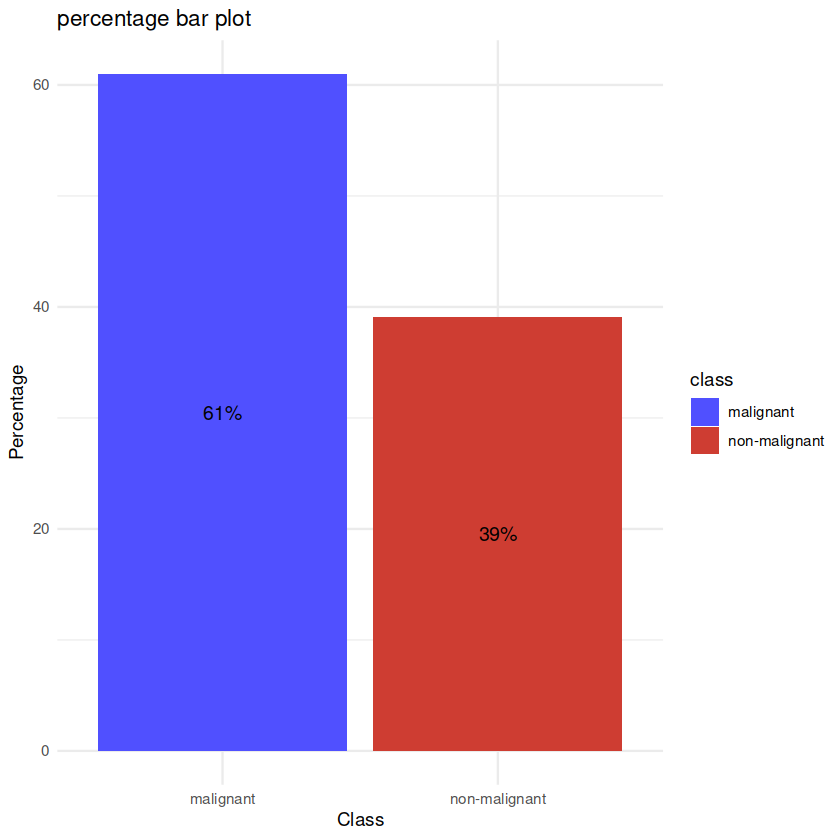

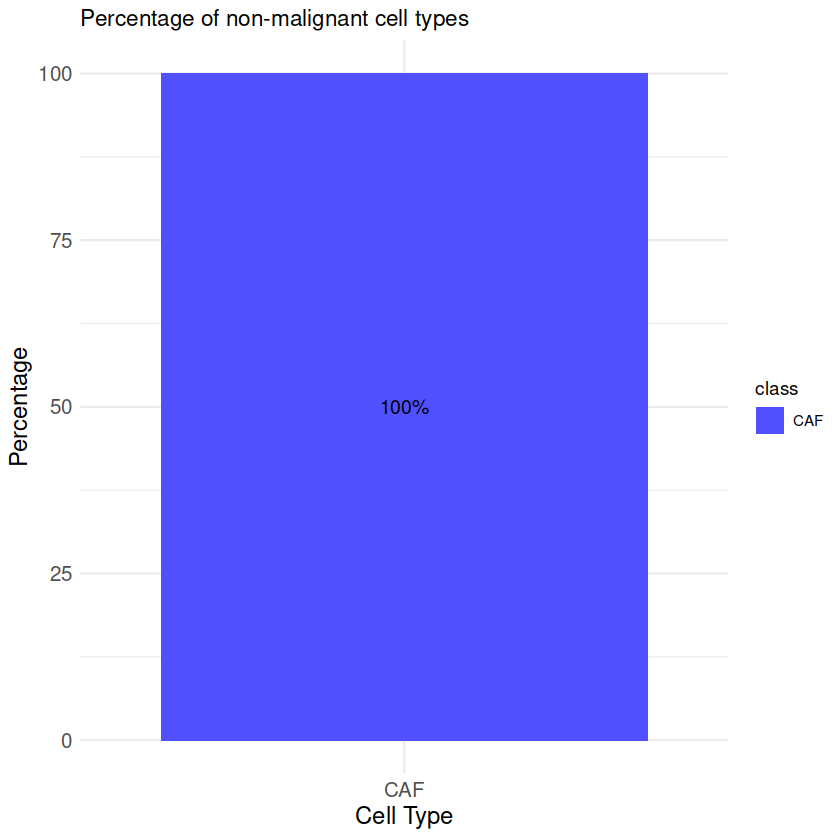

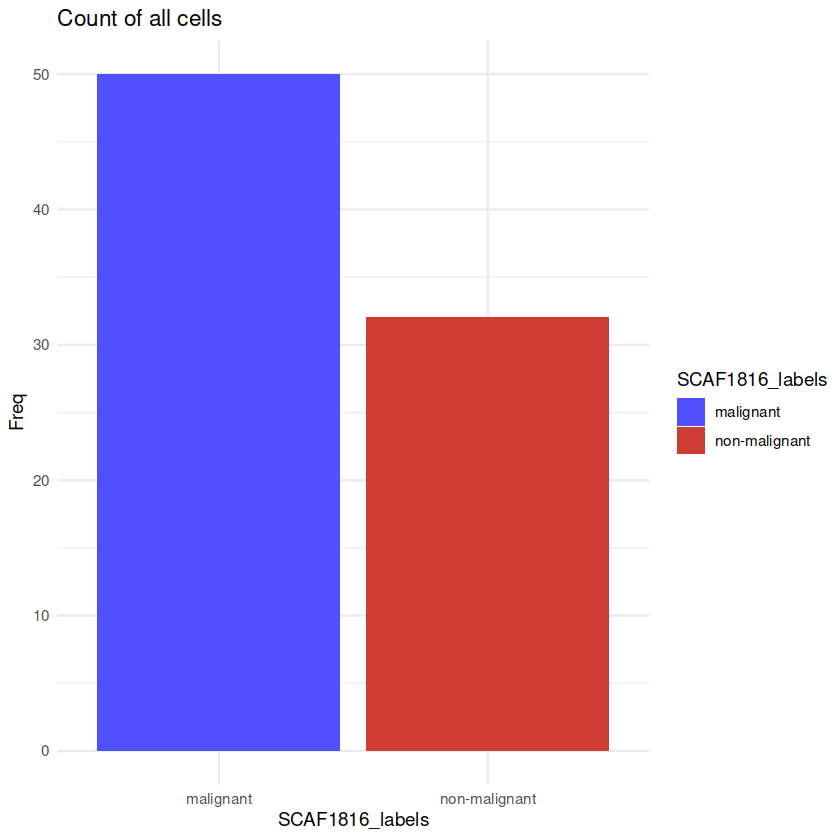

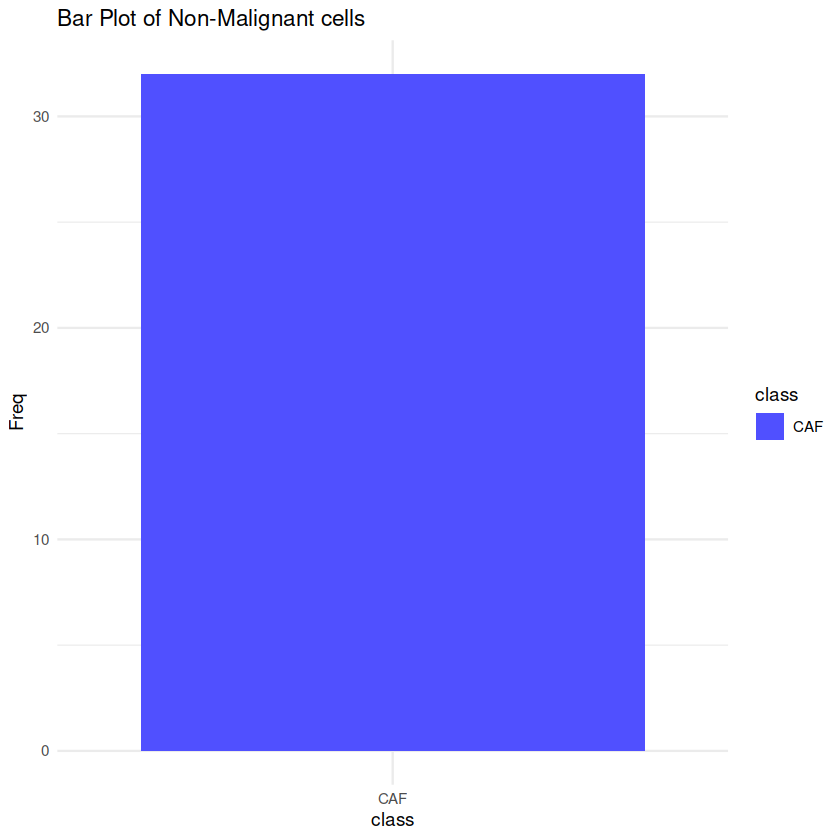

In [26]:
## For sample SCAF1816

## Step 1. Read the dataset .rds file

SCAF1816 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1816/alternate_cell_cycle_regress_out/SCAF1816_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF1816_new <- RunUMAP(SCAF1816, dims = 1:20)
#DimPlot(SCAF1816_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF1816_labels <- SCAF1816_new$seurat_clusters

## Step 2. Plot parameter starts from here 
# Count the number of cells in each cluster
SCAF1816_counts <- table(SCAF1816_labels)
SCAF1816_df <- data.frame(SCAF1816_counts)


## Step 3. Label the cells as malignant and non-malignant 
SCAF1816_df2 <- SCAF1816_df %>%
  mutate(class = ifelse(SCAF1816_labels %in% c(1,2), "malignant", "non-malignant")) ## replace this with your data malignant cluster

# Calculate the total frequency for each class
total_SCAF1816_df2 <- sum(SCAF1816_df2$Freq[SCAF1816_df2$class == "malignant"])
total_non_SCAF1816_df2 <- sum(SCAF1816_df2$Freq[SCAF1816_df2$class == "non-malignant"])

# Calculate the percentage of SCAF1816_df2 and non-SCAF1816_df2 cells
percentage_SCAF1816_df2 <- (total_SCAF1816_df2 / sum(SCAF1816_df2$Freq)) * 100
percentage_non_SCAF1816_df2 <- (total_non_SCAF1816_df2 / sum(SCAF1816_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF1816_df2, percentage_non_SCAF1816_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()


## Step 4. For Non-Malignant cells
### FOR SCAF1816, Non-malignant cells , Map the cluster which are Non-malignant, replace these with for data specific 
SCAF1816_df3 <- SCAF1816_df
label_mapping <- list(
  "CAF" = 0
)

# Map labels based on the defined mapping
SCAF1816_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF1816_df3$class[SCAF1816_df3$SCAF1816_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF1816_df3 <- SCAF1816_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF1816_df3$Freq)

# Calculate the percentage of each label group
SCAF1816_df3 <- SCAF1816_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF1816_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))



## Step 5. ## For bar plot of all the cells
SCAF1816_df4 <- SCAF1816_df
SCAF1816_df4$SCAF1816_labels <- ifelse(SCAF1816_df4$SCAF1816_labels %in% c(1,2), "malignant", "non-malignant")
ggplot(SCAF1816_df4, aes(x = SCAF1816_labels, y = Freq, fill = SCAF1816_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")


## Step 6. For bar plot of non_malignant <- SCAF1816_df
non_malignant <- SCAF1816_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  "CAF" = 0
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF1816_labels %in% label_values] <- class_name
}

# Skip labels malignant labels
non_malignant <- non_malignant[!(non_malignant$SCAF1816_labels %in% c(1,2)), ] ## replace this with your malgnant cluster


ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

20:45:56 UMAP embedding parameters a = 0.9922 b = 1.112

20:45:56 Read 685 rows and found 20 numeric columns

20:45:56 Using Annoy for neighbor search, n_neighbors = 30

20:45:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:45:56 Writing NN index file to temp file /lscratch/8313375/RtmpBNVeon/file3245b96991d76f

20:45:56 Searching Annoy index using 1 thread, search_k = 3000

20:45:57 Annoy recall = 100%

20:45:57 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:45:58 Initializing from normalized Laplacian + noise (using RSpectra)

20:45:58 Commencing optimization for 500 epochs, with 27444 positive edges

20:45:59 Optimization finished



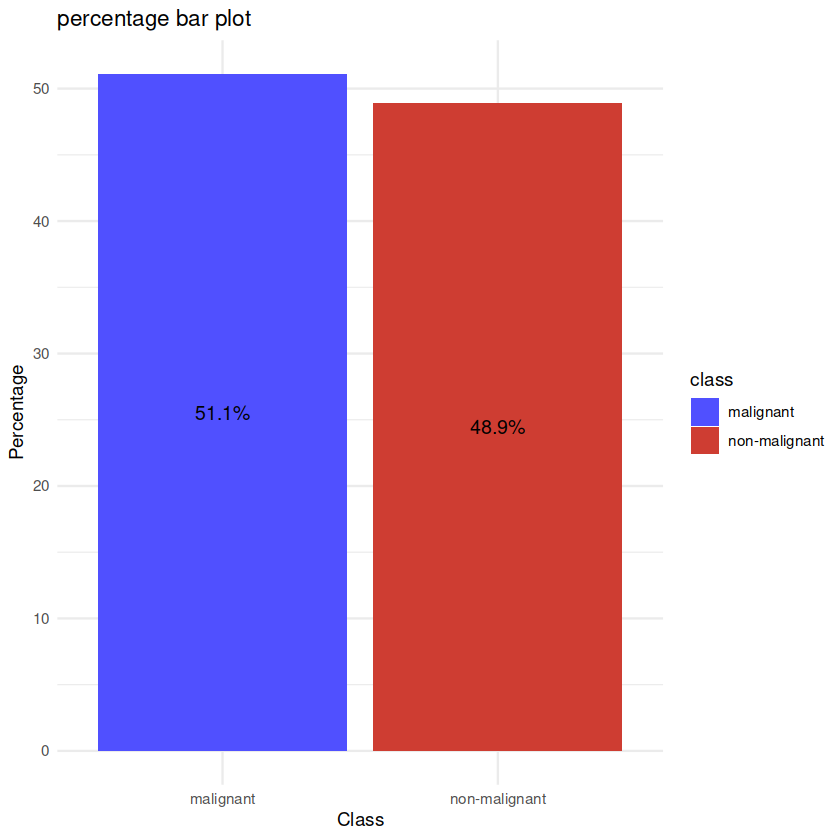

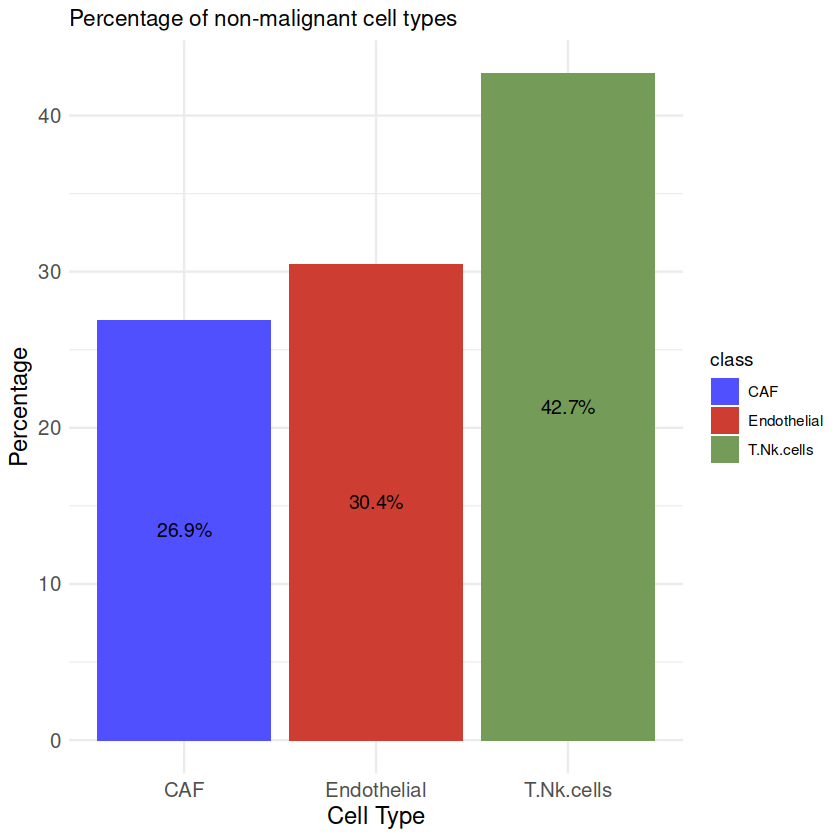

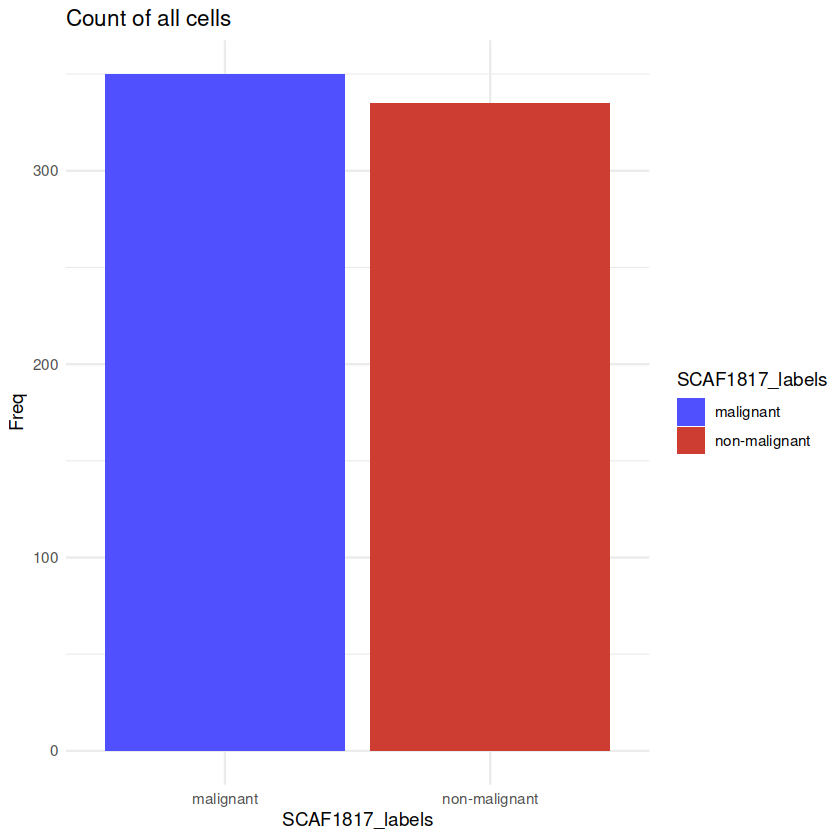

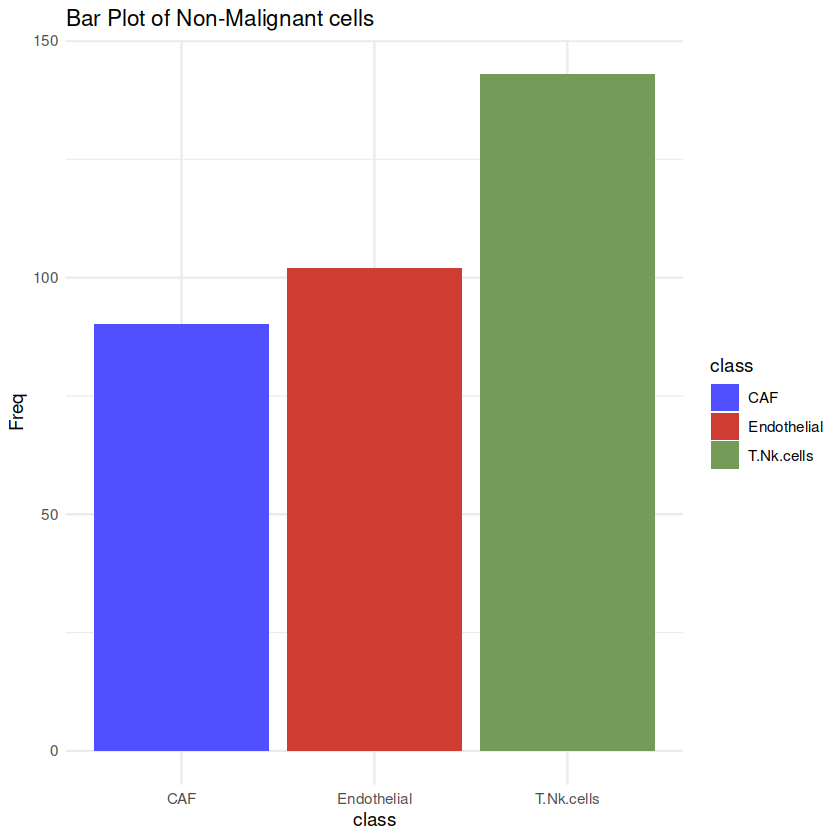

In [27]:
## For sample SCAF1817

## Step 1. Read the dataset .rds file

SCAF1817 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1817/alternate_cell_cycle_regress_out/SCAF1817_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF1817_new <- RunUMAP(SCAF1817, dims = 1:20)
#DimPlot(SCAF1817_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF1817_labels <- SCAF1817_new$seurat_clusters

## Step 2. Plot parameter starts from here 
# Count the number of cells in each cluster
SCAF1817_counts <- table(SCAF1817_labels)
SCAF1817_df <- data.frame(SCAF1817_counts)


## Step 3. Label the cells as malignant and non-malignant 
SCAF1817_df2 <- SCAF1817_df %>%
  mutate(class = ifelse(SCAF1817_labels %in% c(1,2,5,6), "malignant", "non-malignant")) ## replace this with your data malignant cluster

# Calculate the total frequency for each class
total_SCAF1817_df2 <- sum(SCAF1817_df2$Freq[SCAF1817_df2$class == "malignant"])
total_non_SCAF1817_df2 <- sum(SCAF1817_df2$Freq[SCAF1817_df2$class == "non-malignant"])

# Calculate the percentage of SCAF1817_df2 and non-SCAF1817_df2 cells
percentage_SCAF1817_df2 <- (total_SCAF1817_df2 / sum(SCAF1817_df2$Freq)) * 100
percentage_non_SCAF1817_df2 <- (total_non_SCAF1817_df2 / sum(SCAF1817_df2$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_SCAF1817_df2, percentage_non_SCAF1817_df2)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "percentage bar plot",
       x = "Class",
       y = "Percentage") +
 scale_fill_igv() +
  theme_minimal()


## Step 4. For Non-Malignant cells
### FOR SCAF1817, Non-malignant cells , Map the cluster which are Non-malignant, replace these with for data specific 
SCAF1817_df3 <- SCAF1817_df
label_mapping <- list(
  "T.Nk.cells" = 0,
   "CAF" = 4,
   "Endothelial" = 3
)

# Map labels based on the defined mapping
SCAF1817_df3$class <- NA
for (label in names(label_mapping)) {
  SCAF1817_df3$class[SCAF1817_df3$SCAF1817_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
SCAF1817_df3 <- SCAF1817_df3 %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(SCAF1817_df3$Freq)

# Calculate the percentage of each label group
SCAF1817_df3 <- SCAF1817_df3 %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(SCAF1817_df3, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of non-malignant cell types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_igv() +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))



## Step 5. ## For bar plot of all the cells
SCAF1817_df4 <- SCAF1817_df
SCAF1817_df4$SCAF1817_labels <- ifelse(SCAF1817_df4$SCAF1817_labels %in% c(1,2,5,6), "malignant", "non-malignant")
ggplot(SCAF1817_df4, aes(x = SCAF1817_labels, y = Freq, fill = SCAF1817_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")


## Step 6. For bar plot of non_malignant <- SCAF1817_df
non_malignant <- SCAF1817_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  "T.Nk.cells" = 0,
   "CAF" = 4,
   "Endothelial" = 3
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF1817_labels %in% label_values] <- class_name
}

# Skip labels malignant labels
non_malignant <- non_malignant[!(non_malignant$SCAF1817_labels %in% c(1,2,5,6)), ] ## replace this with your malgnant cluster


ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")